## Image Generation

### Inpainting

In [15]:
import boto3
import json
import base64
from PIL import Image

bedrock_runtime = boto3.client(region_name='us-east-1', service_name='bedrock-runtime')

In [6]:
with open('napoleon.png', 'rb') as f:
    content = f.read()
    image_string = base64.b64encode(content).decode('utf-8')

In [7]:
with open('mask.png', 'rb') as f:
    content = f.read()
    image_string_mask = base64.b64encode(content).decode('utf-8')

In [9]:
parameters = {
    'taskType': 'INPAINTING',
    'inPaintingParams': {
        'text': 'Person stands in a green forest, lots of trees, national park',
        'image': image_string,
        'maskImage': image_string_mask
    },
    'imageGenerationConfig': {
        'numberOfImages': 1,
        'quality': 'premium',
        'height': 512,
        'width': 512
    }
}

In [10]:
request_body = json.dumps(parameters)

In [11]:
response = bedrock_runtime.invoke_model(body=request_body,
                                        modelId='amazon.titan-image-generator-v1')

In [12]:
response_body = json.loads(response.get('body').read())

In [13]:
base64_image_data = base64.b64decode(response_body['images'][0])

In [14]:
file_path = 'example_inpainting.png'

with open(file_path, 'wb') as file:
    file.write(base64_image_data)

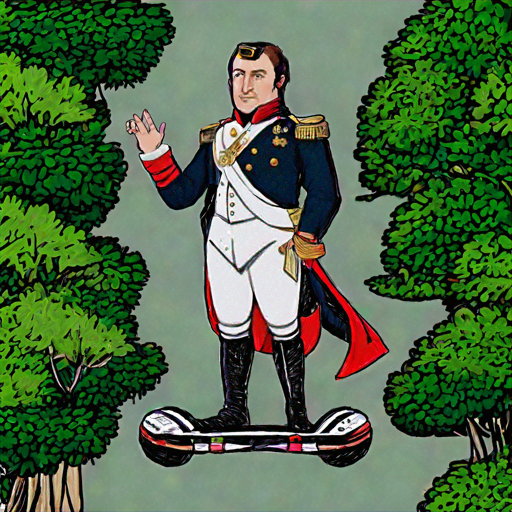

In [16]:
Image.open(file_path)